# Main File For Project


In [155]:
#@author -Tejasvi Sharma
#This file will be the starting point of the Project.
#First Part will be to Load the Data Set.

In [156]:
#packages required
from log import Logger
import pandas as pd
import sys
import matplotlib.pyplot as plt
import seaborn as sns
from IPython import display
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Imputer
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
sns.set()


In [157]:
#Code to upload train and test file.
file_type=input("Enter the type of train and test file")
file_path_train=input("Enter the file name of train file")
file_path_test=input("Enter the file name of train file")
print("\n")

if( str.lower(file_type)=='csv' or str.lower(file_type)=='tsv' or str.lower(file_type)=='excel'):
#Loading the train file
    try:
        if(str.lower(file_type)=='csv'):
            df=pd.read_csv(file_path_train)
        elif(str.lower(file_type)=='tsv'):
            df=pd.read_csv(file_path_train,sep="    ")
        elif(str.lower(file_type)=='excel'):
            df=pd.read_excel(file_path_train)  
        print("Train File uploaded")
        target_column="income"
        Logger.logger.info("Train File Uploaded")
    except Exception as e:
        print("Train File not Uploaded: Error")
        Logger.logger.error("Train File not found"+ " either file name or path is wrong")
        exit  #to stop execution
        
#Loading the test file
    try:
        if(str.lower(file_type)=='csv'):
            df_test=pd.read_csv(file_path_test)
        elif(str.lower(file_type)=='tsv'):
            df_test=pd.read_csv(file_path_test,sep="    ")
        elif(str.lower(file_type)=='excel'):
            df_test=pd.read_excel(file_path_test)  
        print("Test File uploaded")
        Logger.logger.info("Test File Uploaded")
    except Exception as e:
        print("Test File not Uploaded: Error")
        Logger.logger.error("Test File not found"+ " either file name or path is wrong")
        exit #to stop execution
    
    
else:
    print("File type not supported")
    exit # to stop execution
    

Enter the type of train and test filecsv
Enter the file name of train filetrain_data.csv
Enter the file name of train filetest_data.csv


Train File uploaded
Test File uploaded


# Summary of the Data Set 

Summary statistics for column AGE  


count    32561.000000
mean        38.581647
std         13.640433
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
max         90.000000
Name: age, dtype: float64
Unique values in Column are 73


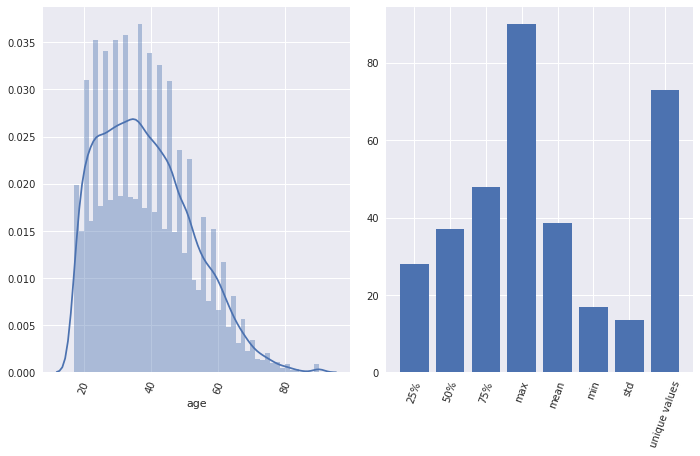

Summary for column WORKCLASS  




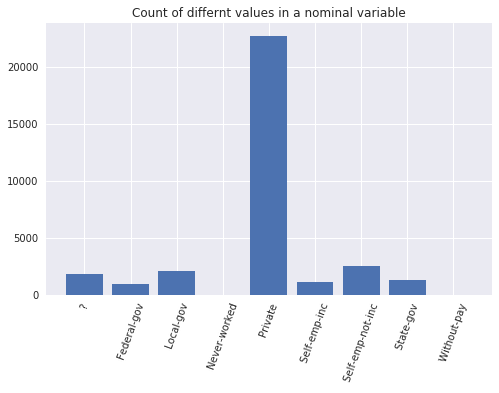

Summary statistics for column FNLWGT  


count    3.256100e+04
mean     1.897784e+05
std      1.055500e+05
min      1.228500e+04
25%      1.178270e+05
50%      1.783560e+05
75%      2.370510e+05
max      1.484705e+06
Name: fnlwgt, dtype: float64
Unique values in Column are 21648


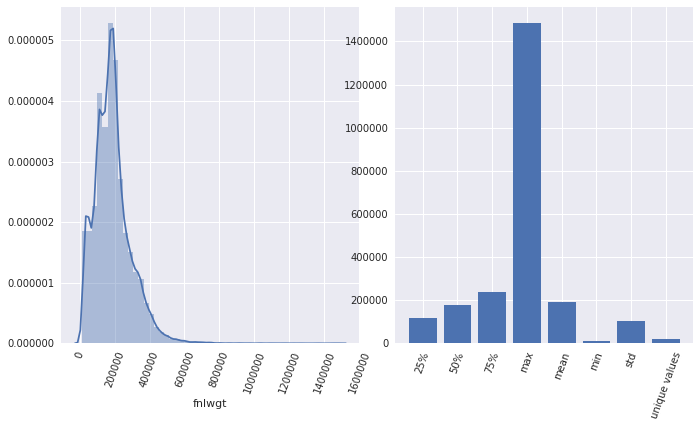

Summary for column EDUCATION  




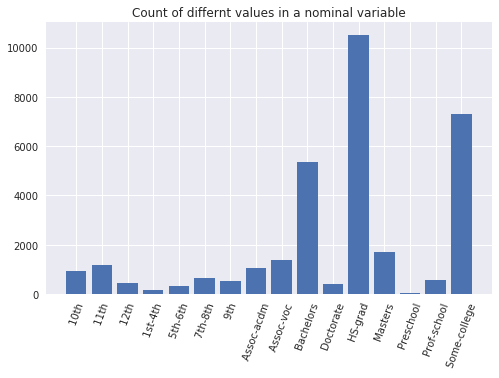

Summary statistics for column EDUCATION-NUM  


count    32561.000000
mean        10.080679
std          2.572720
min          1.000000
25%          9.000000
50%         10.000000
75%         12.000000
max         16.000000
Name: education-num, dtype: float64
Unique values in Column are 16


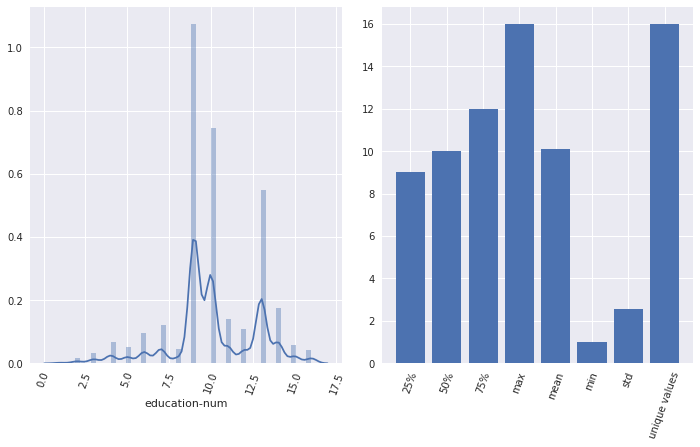

Summary for column MARITAL-STATUS  




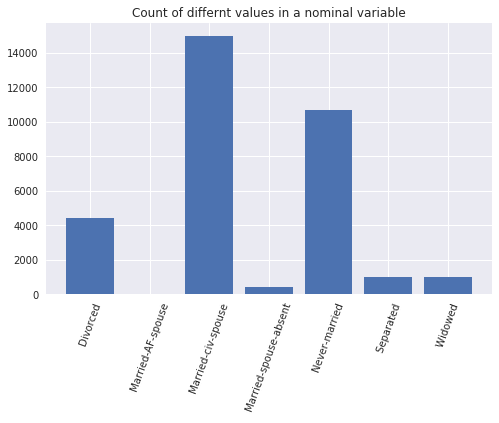

Summary for column OCCUPATION  




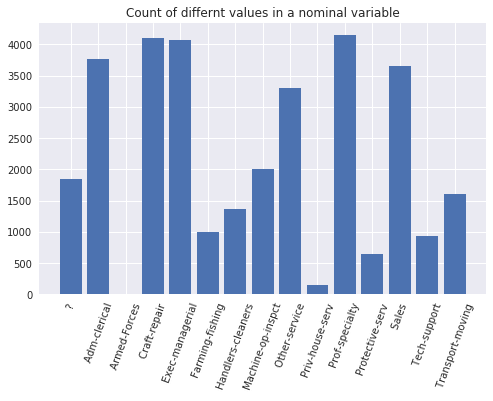

Summary for column RELATIONSHIP  




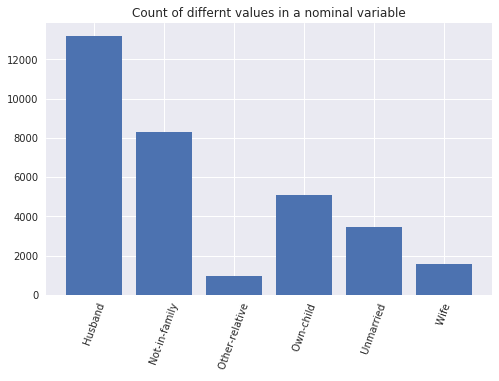

Summary for column RACE  




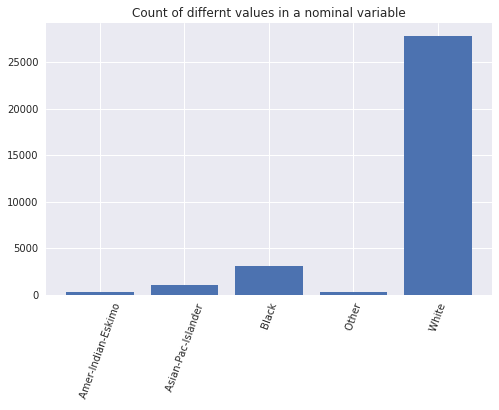

Summary for column SEX  




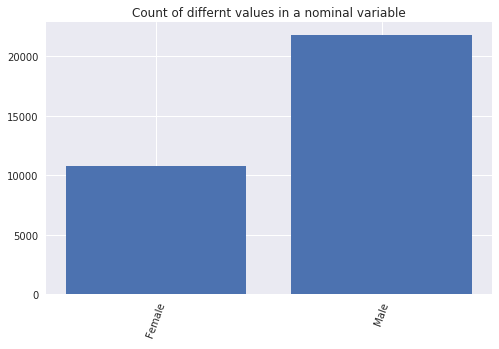

Summary statistics for column CAPITAL-GAIN  


count    32561.000000
mean      1077.648844
std       7385.292085
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      99999.000000
Name: capital-gain, dtype: float64
Unique values in Column are 119


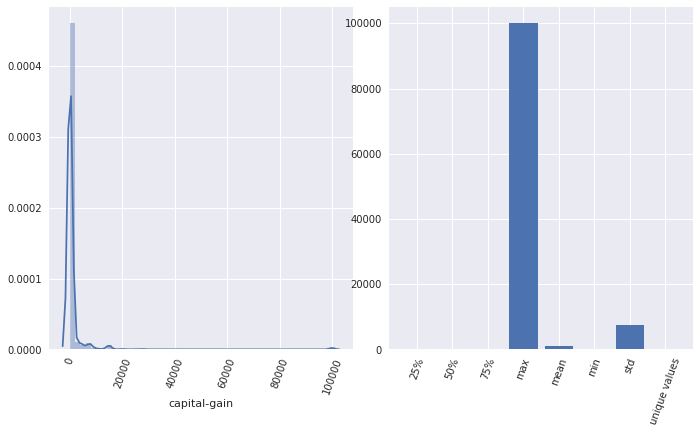

Summary statistics for column CAPITAL-LOSS  


count    32561.000000
mean        87.303830
std        402.960219
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       4356.000000
Name: capital-loss, dtype: float64
Unique values in Column are 92


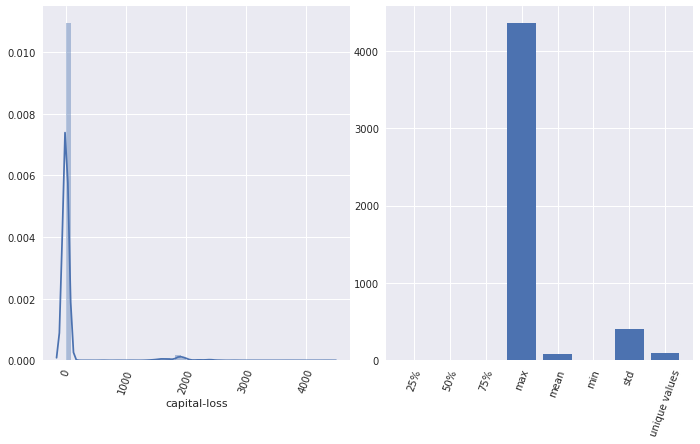

Summary statistics for column HOURS-PER-WEEK  


count    32561.000000
mean        40.437456
std         12.347429
min          1.000000
25%         40.000000
50%         40.000000
75%         45.000000
max         99.000000
Name: hours-per-week, dtype: float64
Unique values in Column are 94


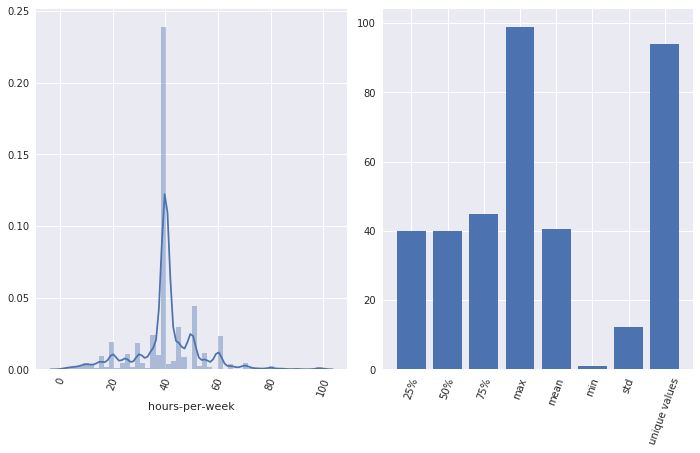

Summary for column NATIVE-COUNTRY  




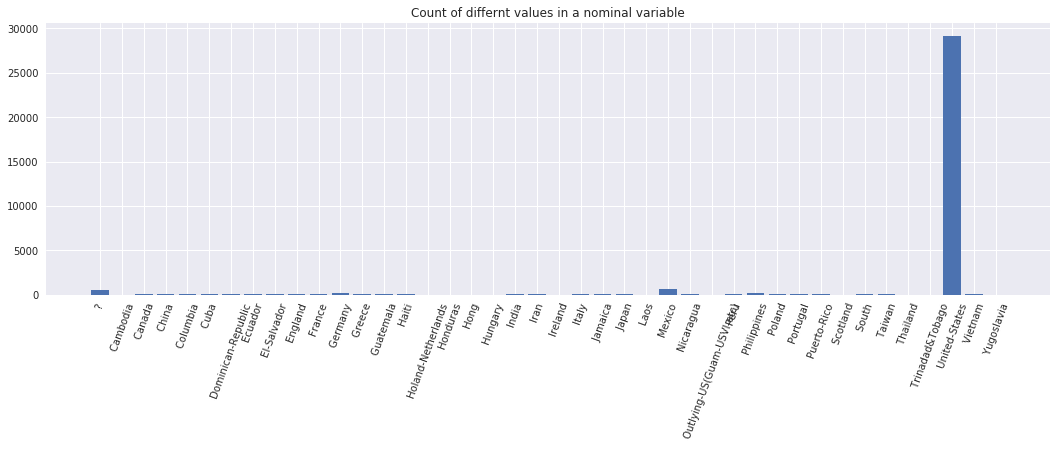

In [4]:
#We can also add graphs for different column
#For numerical, we will use histograms,line plot and histogram
#For categorical , data we will use count plot or bar plot
#Will print distinct values for objects and String values with unique values
#For numerical values it will print summary of the data, with unique counts
#Showing a Snapshot of Data Set
data_types=df.dtypes # a series which has the data type for every column
Col_type={} #to store the type of Column, whether that column is Cat or Cont
#Show the summary of the data

for i in [1,2]:
    for col in df.columns:
        try:
            if(col != target_column):
                if(data_types[col] == 'int64' or data_types[col] =='float64'):
                    print("Summary statistics for column "+str.upper(col)," ")
                    print("\n")
                    print(df[col].describe())
                    print("Unique values in Column are "+str(df[col].nunique()))
                    #adding unique value count to the summary
                    index_values=list(df[col].describe().index)
                    index_data=list(df[col].describe())
                    del index_data[index_values.index('count')] #deleting count values as they are redundant 
                    index_values.remove('count')
                    #adding unique values data to display
                    index_values.append('unique values')
                    index_data.append(df[col].nunique())

                    plt.figure(figsize=(10,6))
                    plt.subplot(1, 2, 1)
                    fig1=sns.distplot(df[col])
                    plt.xticks(rotation=70)
                    plt.subplot(1, 2, 2)
                    plt.tight_layout()
                    fig2=plt.bar(np.array(index_values),np.array(index_data))
                    #fig2=plt.bar(df[col].describe().index,df[col].describe())
                    plt.xticks(rotation=70)
                    plt.show()
                else:
                    print("Summary for column "+str.upper(col)," ")
                    df_group=df[[col,target_column]].groupby(col).count()
                    df_group.columns=['count']
                    if(col == 'native-country'):
                        plt.figure(figsize=(18,5))
                    else:
                        plt.figure(figsize=(8,5))
                    plt.bar(df_group.index,df_group['count'])
                    print("\n")
                    plt.title("Count of differnt values in a nominal variable")
                    plt.xticks(rotation=70)
                    plt.show()

                if(i==1):
                    typ=input("Tell the type of column that is whether the column is cont or cat , use only CAT and CONT")
                    Col_type[col]=typ
                    display.clear_output(wait=True)
        except Exception as e:
                Logger.logger.error("error while creating graphs for column "+col)

        

Column age has no Missing Vlaues
Column capital-gain has no Missing Vlaues
Column hours-per-week has no Missing Vlaues
Column capital-loss has no Missing Vlaues
Column fnlwgt has no Missing Vlaues
Column marital-status has no Missing Vlaues
Column race has no Missing Vlaues
Column relationship has no Missing Vlaues


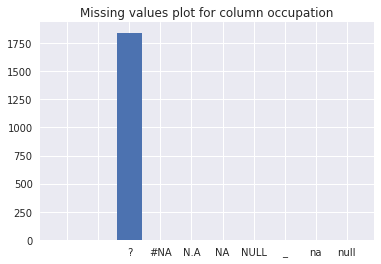

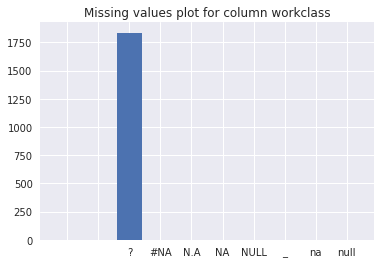

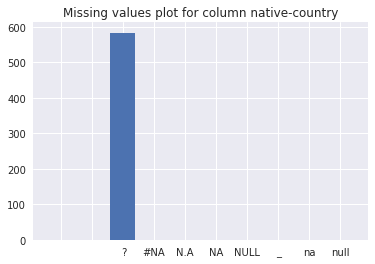

Column education has no Missing Vlaues
Column sex has no Missing Vlaues
Column education-num has no Missing Vlaues


In [158]:
#graph for missing values in every column
#checking for #NA,NA,whitespace,Blank(""),null,NULL,? in Cat Columns
#checking for na values in cont columns
missing_cat_col_list=[] #to save cat columns names  whith missing values
missing_cont_col_list=[] #to save cat columns names  whith missing values
for col,typ in Col_type.items():
    try:
        if(str.lower(typ)=='cont'):
            count_null=df[col].isnull().sum()
            if(count_null == 0):
                print("Column {0} has no Missing Vlaues".format(col))
            else:
                missing_cont_col_list.append(col)
                plt.title("Missing values plot for column "+col)
                plt.plot(np.array([col]),np.array([count_null]))
                plt.show()
        else:
            missing_values_dict={}
            missing_values_list=["NA","N.A","#NA"," ",""," ?","na","NULL","null","_"]
            for val in missing_values_list:
                missing_values_dict[val]=df[df[col]  == val].shape[0]
            keys_list=list(missing_values_dict.keys())
            values_list=list(missing_values_dict.values())
            if(sum(values_list)!=0):
                missing_cat_col_list.append(col)
                plt.title("Missing values plot for column "+col)
                plt.bar(np.array(keys_list),np.array(values_list))
                plt.show()
            else:
               print("Column {0} has no Missing Vlaues".format(col)) 
    except Exception as e:
        print(e)
        Logger.logger.error("Error while making graph for missing value in column "+col)
        




# Imputing values

In [159]:
#@function purpose -> to create imputer objects for columns with missing data values and return those objects, Only for cat columns
# @param train_data, data on which the imputer will learn
# @param col_list, columns with missing data
# @param col_list_dict, dict which has the type for every column
# @param missing_values_list, has the list of data which might be in place of missing data, we will impute these values
missing_values_list=["NA","N.A","#NA"," ",""," ?","na","NULL","null","_"]

#@param train_data, data to be cleaned
#@param col_list, list of columns to be cleaned
#@param col_list_dict, 
def Impute_train_cat(train_data,col_list,col_list_dict):
    impute_dict={}
    for col in col_list:
        if(str.lower(col_list_dict[col]) == 'cat'):
            most_frequent=train_data[col].value_counts().idxmax()
        impute_dict[col]=most_frequent
    
    return(impute_dict)
              
    
def Impute_transform_cat(test_data,col_list,col_list_dict,impute_dict):
    imp_object_list=[]
    for col in col_list:
        if(str.lower(col_list_dict[col]) == 'cat'):
            most_common=impute_dict[col]
            print(most_common)
            def replace_most_common(x):
                if x in missing_values_list:
                    return most_common
                else:
                    return x
            test_data[col]= test_data[col].map(replace_most_common)
   
            
    return(test_data)
            
#tested working, imputing data values   

In [160]:
#will build two pipelines one on model with imputed data and one with after removing missing rows
#module to return impute model on train data
#using mode on categorical data
#will call the impute module to impute data and clean module to remove the rows with missing data, impute model will only 
#provide model, for every column,we will add the objects to pipeline
#print(missing_cat_col_list)
#loop for column with cat values to create a model to impute values with missing values.
impute_model_cat=[] # to save impute models of cat columns
impute_model_cat.append(Impute_train_cat(df,missing_cat_col_list,Col_type))

#to apply transformation on train and test data.
#applying transformation on train Data
df_train_imputed=Impute_transform_cat(df,missing_cat_col_list,Col_type,impute_model_cat[0])
#applying transformation in test Data
df_test_imputed=Impute_transform_cat(df_test,missing_cat_col_list,Col_type,impute_model_cat[0])

    



 Prof-specialty
 Private
 United-States
 Prof-specialty
 Private
 United-States


# Imputing continuous data, if any continuous column has a missing value 


In [161]:
#creating Imputer to remove Nan values from the dataset
#It only works when some column is missing any data values
if(len(missing_cont_col_list)!=0):
    for col_name in missing_cont_col_list:
        imp=Imputer(missing_values=np.nan,strategy="median",axis=0)
        imp.fit(df_train_imputed[col_name])
        df_train_imputed[col_name]=imp.transform(df_train_imputed[[col_name]]).ravel()
        df_test_imputed[col_name]=imp.transform(df_test_imputed[[col_name]]).ravel()



# Encoding categorical values

In [162]:
#Will develop preprocessing module to preprocess data according to the type data, this module will only-
#-create objects to preprocess data for all the column and return a list of objects which we can add to a pipeline
# Label encoding with sklearn's LabelEncoder
for col,typ in Col_type.items():
    if(str.lower(typ)=='cat'):
        class_le = LabelEncoder()
        class_le.fit(df_train_imputed[col].values) #training with train data
        df_train_imputed[col]=class_le.transform(df_train_imputed[col]) #transforming the train data
        df_test_imputed[col]=class_le.transform(df_test_imputed[col]) #transforming the test data using train data

# Scaling Continuous Data

In [163]:
#preprocessing continuous data, using Standard Scaler
#Using cont columns only
for col,typ in Col_type.items():
    if(str.lower(typ)=='cont'):
        scale = StandardScaler()
        scale.fit(df_train_imputed[[col]]) #training with train data
        df_train_imputed[col]=scale.transform(df_train_imputed[[col]]) #transforming the train data
        df_test_imputed[col]=scale.transform(df_test_imputed[[col]]) #transforming the test data using train data

# Creating dummy columns for categorical variables

In [152]:
#on hold as for I read on this link 
#https://medium.com/data-design/visiting-categorical-features-and-encoding-in-decision-trees-53400fa65931
#code to convert the encoded categorical columns to dummy variables
# for col,typ in Col_type.items():
#     if(str.lower(typ)=='cat'):
#         df5=pd.get_dummies(df_test_imputed[["workclass",'education']])

In [170]:
#encoding our target variable
target_values=list(df_train_imputed[target_column].unique())
target_column_mapping_train=dict([(target_values[i],i) for i in range(len(target_values))])
target_column_mapping_test=dict([((target_values[i]+"."),i) for i in range(len(target_values))])

#transforming target column, i.e encoding target column, binary data

df_test_imputed[target_column]=df_test_imputed[target_column].map(target_column_mapping_test)
df_train_imputed[target_column]=df_train_imputed[target_column].map(target_column_mapping_train)

# Implementing Random Forest

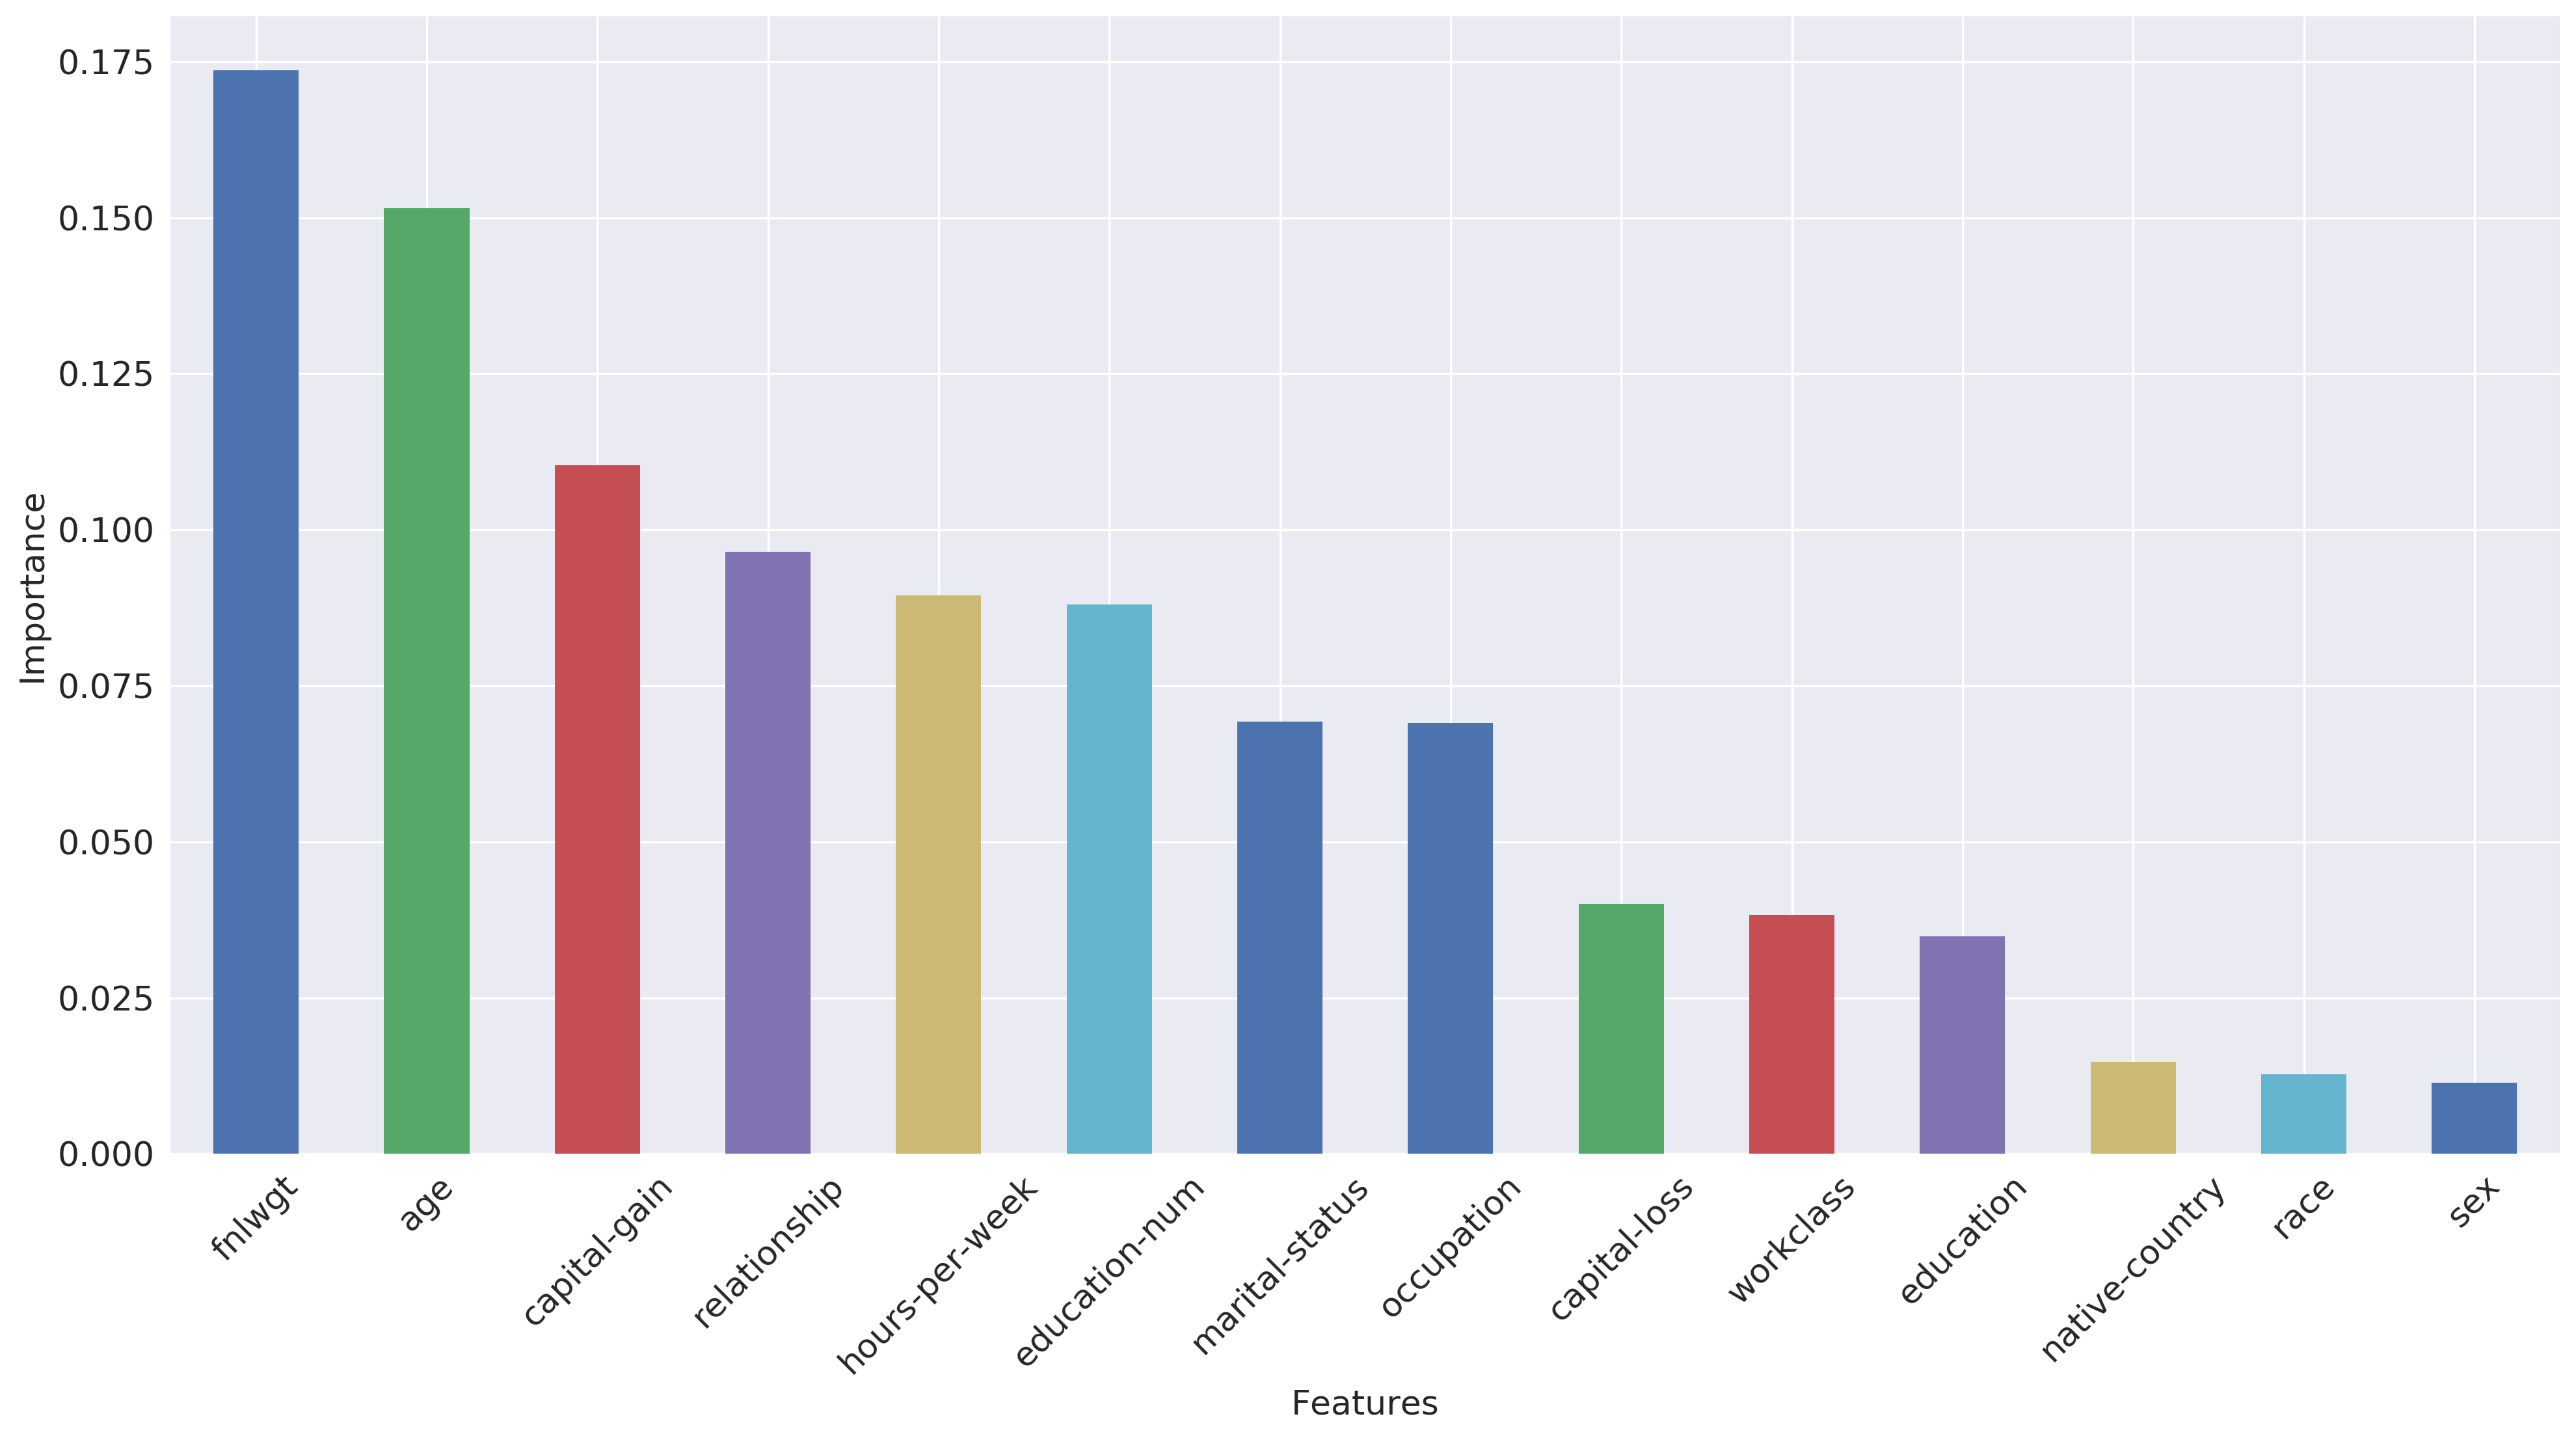

(0.85074626865671643, 0.85074626865671643, 0.85074626865671643, None)


In [195]:
#importing RandomForestClassifier

#First creating a model with imputed Data
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_fscore_support
# Random forest classifier
rfc = RandomForestClassifier(random_state=0)
# Train the model
X_train=df_train_imputed.iloc[:,:-1].values
y_train=df_train_imputed.iloc[:,-1].values
rfc.fit(X_train,y_train)
# Get the feature importances
importances = rfc.feature_importances_

# Make the bar Plot from importances 
# Convert the importances into one-dimensional 1darray with corresponding df column names as axis labels
f_importances = pd.Series(importances, df.columns[:-1])
# Sort the array in descending order of the importances
f_importances.sort_values(ascending=False, inplace=True)
plt.figure(figsize=(16,9),dpi=250)
f_importances.plot(kind='bar', fontsize=15, rot=45)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Importance', fontsize=15)

# Show the plot
plt.tight_layout()
plt.show()

#testing the model
X_test=df_test_imputed.iloc[:,:-1].values
y_test=df_test_imputed.iloc[:,-1].values
print(precision_recall_fscore_support(y_test,rfc.predict(X_test),average='micro'))
#Creating model without Data with removed rows
#will implement afterwards

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' Self-emp-inc', ' Without-pay', ' Never-worked'], dtype=object)